Sample Data:
   OrderID Product     Category  Quantity  Price  OrderDate  Revenue
0        1   Watch  Electronics         2    245 2024-01-01      490
1        2   Phone      Fashion         2     72 2024-01-02      144
2        3   Shoes      Fashion         3    447 2024-01-03     1341
3        4   Phone  Electronics         4    374 2024-01-04     1496
4        5   Phone  Accessories         4    361 2024-01-05     1444


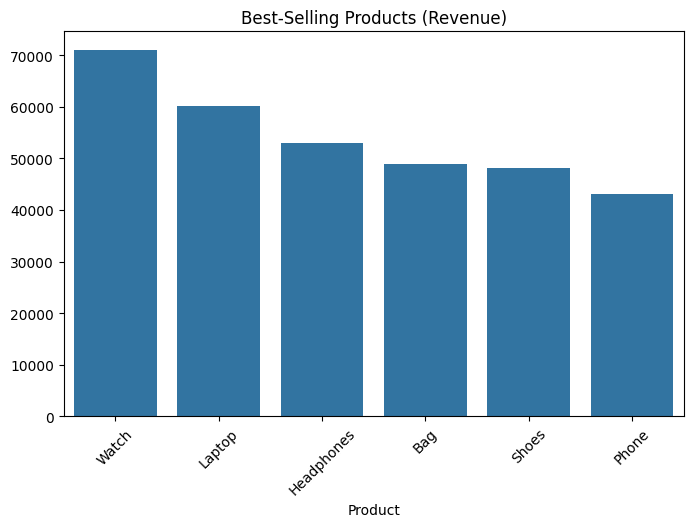

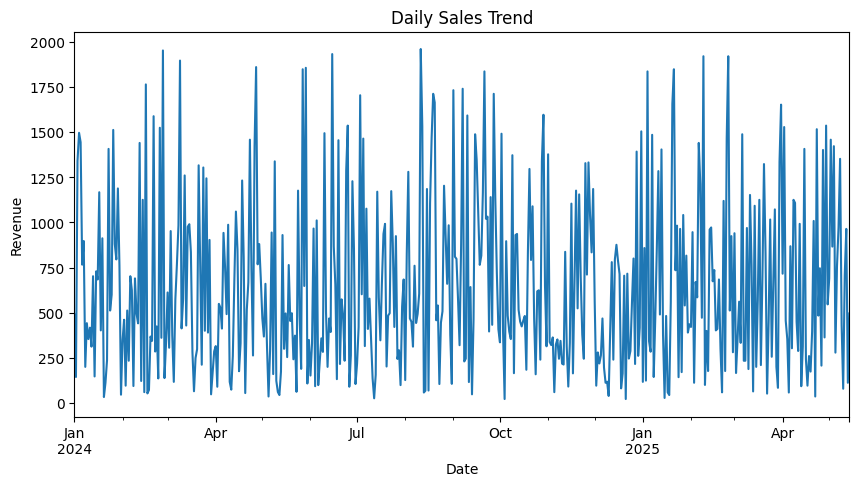

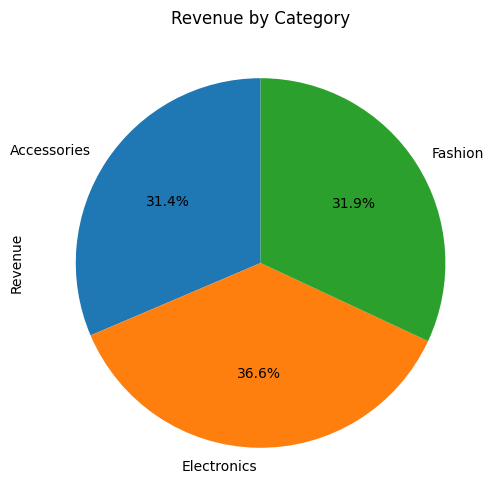

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

n = 500
data = {
    "OrderID": np.arange(1, n+1),
    "Product": np.random.choice(["Laptop", "Headphones", "Shoes", "Watch", "Phone", "Bag"], n),
    "Category": np.random.choice(["Electronics", "Fashion", "Accessories"], n),
    "Quantity": np.random.randint(1, 5, n),
    "Price": np.random.randint(20, 500, n),
    "OrderDate": pd.date_range(start="2024-01-01", periods=n, freq="D")
}

df = pd.DataFrame(data)
df["Revenue"] = df["Quantity"] * df["Price"]

print("Sample Data:")
print(df.head())

product_sales = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Best-Selling Products (Revenue)")
plt.xticks(rotation=45)
plt.show()

sales_trend = df.groupby("OrderDate")["Revenue"].sum()

plt.figure(figsize=(10,5))
sales_trend.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

category_sales = df.groupby("Category")["Revenue"].sum()

plt.figure(figsize=(6,6))
category_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Revenue by Category")
plt.show()
